#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [4]:
# Read the image
img = cv2.imread("plaksha_Faculty.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the Haar cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Detect faces
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

# Define text and font parameters
text = "Face"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_color = (0, 0, 255)
font_thickness = 1

# Draw rectangles around detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)

cv2.imshow(f"Total number of faces detected: {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

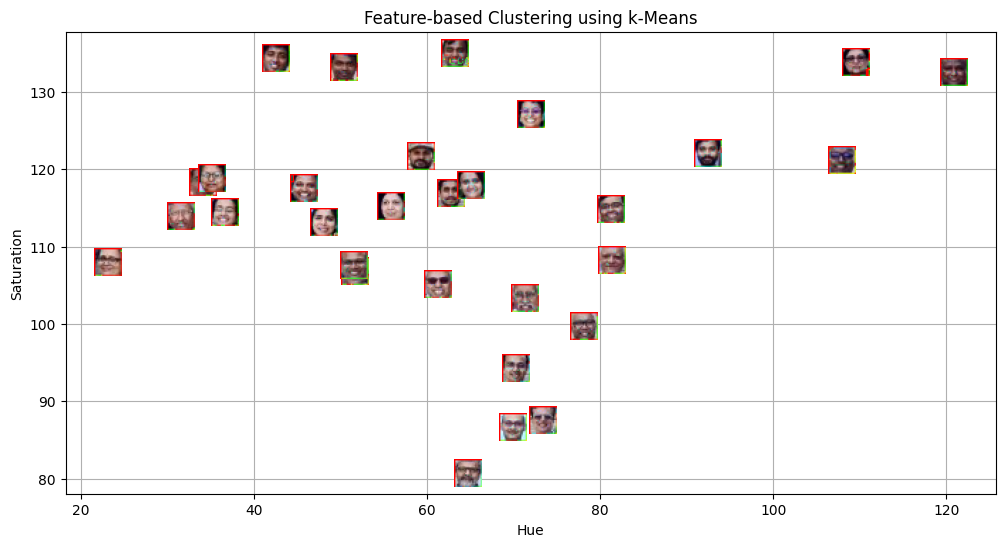

In [5]:
# Convert image to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue_saturation = []
face_images = []

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

# Perform k-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(hue_saturation)

# Plot clustered faces
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Feature-based Clustering using k-Means")
plt.grid()
plt.show()

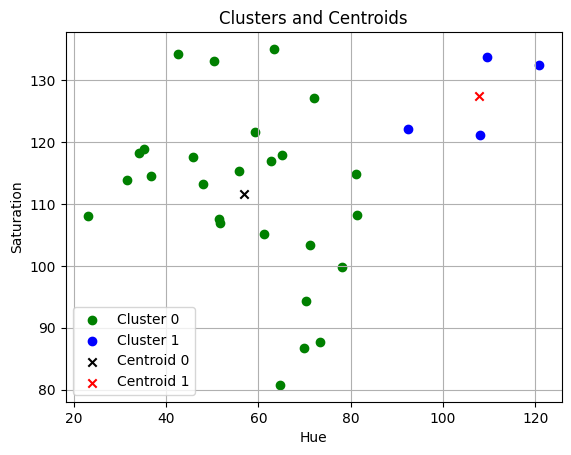

In [6]:
# Create an empty list to store legend labels
legend_labels = []

# Scatter plot for clusters
cluster_0_points = []
cluster_1_points = []

for i in range(len(hue_saturation)):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append(hue_saturation[i])
    else:
        cluster_1_points.append(hue_saturation[i])

cluster_0_points = np.array(cluster_0_points)
cluster_1_points = np.array(cluster_1_points)

plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

plt.scatter(centroid_0[0], centroid_0[1], color='black', marker='x', label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='red', marker='x', label='Centroid 1')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Clusters and Centroids")
plt.legend()
plt.grid()
plt.show()


In [9]:
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.05, 4)

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2.imshow("Detected Template Face", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

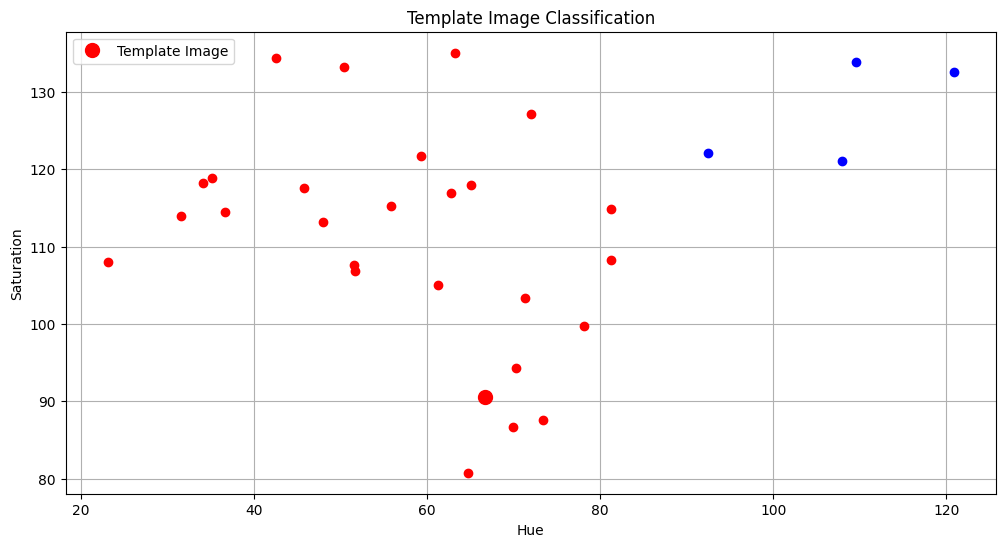

In [10]:
# Convert template image to HSV
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Plot the template in respective cluster
fig, ax = plt.subplots(figsize=(12, 6))
for i in range(len(hue_saturation)):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', color=color)

color = 'red' if template_label == 0 else 'blue'
plt.plot(template_hue, template_saturation, 'o', markersize=10, color=color, label='Template Image')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Template Image Classification")
plt.grid()
plt.legend()
plt.show()

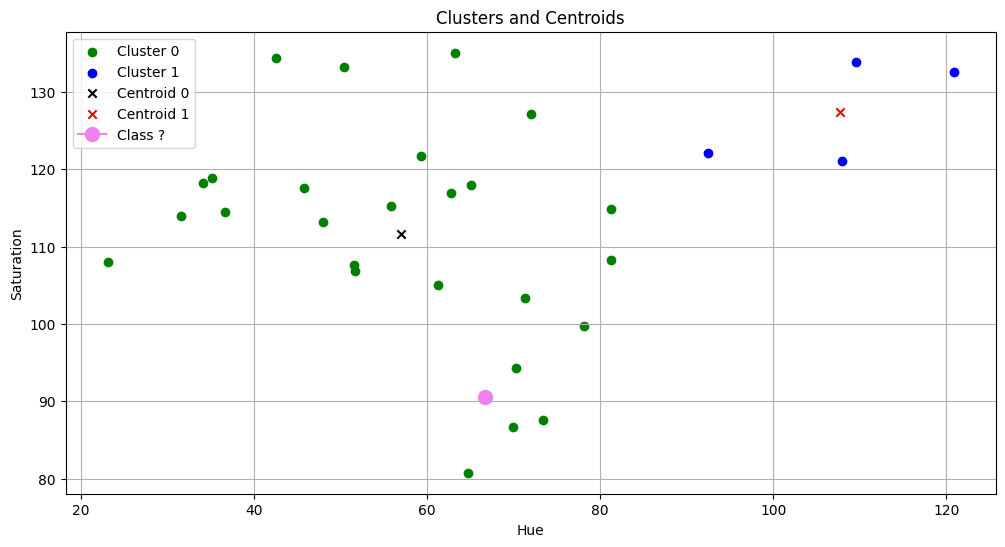

In [11]:
# Scatter plot for clusters
legend_labels = []
cluster_0_points = []
cluster_1_points = []

fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

plt.scatter(centroid_0[0], centroid_0[1], color='black', marker='x', label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='red', marker='x', label='Centroid 1')

plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Class ?')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Clusters and Centroids")
plt.legend()
plt.grid()
plt.show()

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 

1. Common distance metrics used in distance-based classification algorithms include:
   - Euclidean Distance
   - Manhattan Distance
   - Minkowski Distance
   - Cosine Similarity
   - Hamming Distance


2. Real-world applications of distance-based classification algorithms:
   - Face recognition
   - Image retrieval
   - Fraud detection
   - Medical diagnosis
   - Document classification


3. Various distance metrics:
   - Euclidean Distance: Measures the straight-line distance between two points.
   - Manhattan Distance: Measures the distance between two points along axes at right angles.
   - Minkowski Distance: Generalization of both Euclidean and Manhattan distances.
   - Cosine Similarity: Measures the cosine of the angle between two vectors.
   - Hamming Distance: Measures the number of differing bits in two binary strings.

4. Cross-validation helps in assessing model performance by splitting the data into training and validation sets multiple times to reduce bias and variance.

5. Variance and bias in KNN:
   - A small k value leads to low bias and high variance, making the model sensitive to noise.
   - A large k value increases bias but reduces variance, making the model more stable but less flexible.